In [91]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Data Load

In [67]:
df = pd.read_csv('Brazilian_ecommerce (merged).csv', index_col = 0)

# Data Preparation

In [68]:
df['sales'] = df['price'] * df['items_count']

for col in df.columns:
    if col.endswith('_timestamp') or col.endswith('_date') or col.endswith('_at'):
        try:
            # df[col] = pd.to_datetime(df[col]).dt.date
            df[col] = pd.to_datetime(df[col])
            # if col.endswith('_timestamp'):
                # df[col] = pd.to_datetime(df[col])
            # elif col.endswith('_date') or col.endswith('_at'):
                # df[col] = pd.to_datetime(df[col]).dt.date
                # df[col] = pd.to_datetime(df[col]).dt.to_period('M')
        except Exception as e:
            print(f'Error mengonversi kolom {col}: {e}')
            pass

display(df.head())
display(df.info())

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90


<class 'pandas.core.frame.DataFrame'>
Index: 93100 entries, 1 to 96459
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93100 non-null  object        
 1   items_count                    93100 non-null  int64         
 2   customer_id                    93100 non-null  object        
 3   order_status                   93100 non-null  object        
 4   order_purchase_timestamp       93100 non-null  datetime64[ns]
 5   order_approved_at              93100 non-null  datetime64[ns]
 6   order_delivered_carrier_date   93100 non-null  datetime64[ns]
 7   order_delivered_customer_date  93100 non-null  datetime64[ns]
 8   order_estimated_delivery_date  93100 non-null  datetime64[ns]
 9   seller_id                      93100 non-null  object        
 10  shipping_limit_date            93100 non-null  datetime64[ns]
 11  price               

None

In [69]:
df.head()

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90


# EDA

#### Descriptive Analysis

In [70]:
# Data Describe

df.select_dtypes(include = [int, float]).describe().round(2)

,items_count,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,customer_lat,customer_lng,seller_zip_code_prefix,seller_lat,seller_lng,sales
count,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.0,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00
mean,1.20,124.35,20.06,48.20,781.86,2.21,2030.48,29.63,16.13,22.64,1.02,2.9,155.65,4.15,35114.73,-21.20,-46.19,24584.84,-22.80,-47.23,142.97
std,0.75,187.86,15.65,11.48,655.76,1.75,3646.20,16.39,13.20,11.78,0.24,2.7,214.49,1.29,29830.97,5.60,4.06,27722.50,2.76,2.35,241.43
min,1.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.00,1.00,1003.00,-33.69,-72.67,1001.00,-32.07,-63.89,0.85
25%,1.00,40.50,13.21,42.00,341.00,1.00,269.00,18.00,8.00,15.00,1.00,1.0,59.00,4.00,11320.00,-23.59,-48.11,6429.00,-23.61,-48.81,46.99
50%,1.00,78.95,16.32,52.00,598.00,1.00,650.00,24.00,13.00,20.00,1.00,2.0,102.00,5.00,24360.00,-22.93,-46.63,13503.00,-23.43,-46.74,89.00
75%,1.00,139.00,21.15,57.00,990.25,3.00,1800.00,37.00,20.00,30.00,1.00,4.0,173.00,5.00,58701.50,-20.14,-43.64,29156.00,-21.76,-46.52,151.90
max,63.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,19.00,24.0,13664.00,5.00,99980.00,42.18,-7.74,99730.00,-2.50,-34.86,14998.50


#### Weekday vs Weekend Sales

In [176]:
df.head(2)

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,month_order
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.9,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.0,2018-01


In [184]:
df_day_end_sales = df.copy()

df_day_end_sales = df_day_end_sales[['order_id', 'items_count', 'price', 'sales',
                                     'order_purchase_timestamp']]
df_day_end_sales['day'] = df_day_end_sales.order_purchase_timestamp.dt.day_name()

# Classifying weektype
def classify_weektype(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df_day_end_sales['weektype'] = df_day_end_sales.day.apply(classify_weektype)

display(df_day_end_sales.sample(5))
display(df_day_end_sales.info())

,order_id,items_count,price,sales,order_purchase_timestamp,day,weektype
15673,29d86db6d5cb58b37df26cfa3efb17bb,1,318.98,318.98,2018-07-30 12:40:28,Monday,Weekday
14194,25cb912c6742e486c6988aaf2c8f221b,4,56.99,227.96,2018-02-18 07:40:25,Sunday,Weekend
20881,379281cb6937d39c00978dd24e8a71bb,1,24.90,24.90,2018-05-24 16:58:49,Thursday,Weekday
19220,3340fd16bb81e26a23a17a1b9da63186,1,139.99,139.99,2017-11-11 23:11:23,Saturday,Weekend
5869,0f6a5e91a0432f84b83844d7b001d765,1,99.99,99.99,2017-08-01 00:22:08,Tuesday,Weekday


<class 'pandas.core.frame.DataFrame'>
Index: 93100 entries, 1 to 96459
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  93100 non-null  object        
 1   items_count               93100 non-null  int64         
 2   price                     93100 non-null  float64       
 3   sales                     93100 non-null  float64       
 4   order_purchase_timestamp  93100 non-null  datetime64[ns]
 5   day                       93100 non-null  object        
 6   weektype                  93100 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.7+ MB


None

In [188]:
df_weektype = df_day_end_sales.groupby('weektype').agg({'order_id' : 'count',
                                                        'items_count' : 'sum',
                                                        'sales': ['sum', 'mean']}).round(2)
df_weektype.columns = ['count', 'items_count', 'sales_sum', 'sales_avg']
df_weektype

,count,items_count,sales_sum,sales_avg
weektype,,,,
Weekday,71712,86299,10285318.76,143.43
Weekend,21388,25290,3025026.24,141.44


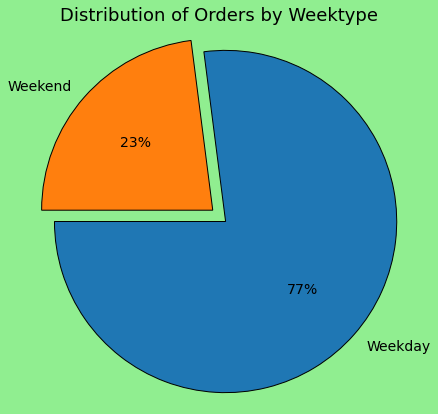

In [207]:
# Pie Chart

df_weektype_dict = df_weektype['count'].to_dict()

labels = df_weektype_dict.keys()
sizes = df_weektype_dict.values()

plt.figure(figsize = (7, 7), facecolor = 'lightgreen')
plt.pie(sizes, labels = labels, 
        autopct = '%1.0f%%', 
        startangle = 180,
        textprops = {'fontsize': 14},
        explode = (0, 0.1),
        wedgeprops = {'edgecolor': 'black'})
        # colors = ['skyblue', 'lightgreen'])
plt.title('Distribution of Orders by Weektype', fontsize = 18)
plt.axis('equal')  
plt.show()

#### Review Score vs Average Shipping

In [292]:
df_shipping_score = df.copy()
df_shipping_score = df_shipping_score[['order_id', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']]
df_shipping_score['shipment_time'] = abs(df_shipping_score['order_delivered_carrier_date'] - df_shipping_score['order_delivered_customer_date'])
# df_shipping_score['shipment_time'] = df_shipping_score['shipment_time'].dt.day()
# display(df_shipping_score.head())
# display(df_shipping_score.info())
df_shipping_score = df_shipping_score.groupby('review_score').agg(
    avg_shipment_time=('shipment_time', lambda x: x.mean().days), 
    order_count=('order_id', 'count') 
)

# plt.plot(df_shipping_score[['shipment_time']])

,avg_shipment_time,order_count
review_score,,
1,16,9100
2,12,2846
3,10,7701
4,9,18365
5,7,55088


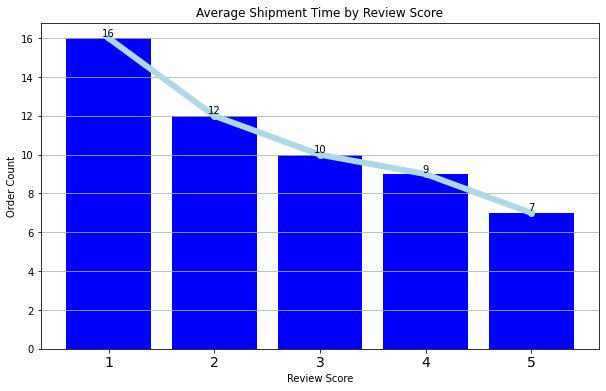

In [310]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_shipping_score.index, df_shipping_score['avg_shipment_time'], 
               label = 'Shipment Time', color = 'blue')

plt.plot(df_shipping_score.index, df_shipping_score['avg_shipment_time'], 
         color = 'lightblue', marker = 'o', label = 'Avg Shipment Time (days)',
         linewidth = 6)

plt.title('Average Shipment Time by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Order Count')
plt.xticks(fontsize = 14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha = 'center', va = 'bottom', fontsize = 10)

plt.grid(axis = 'y')

plt.show()

#### Payment Type

In [172]:
df.payment_type.value_counts()

payment_type
credit_card    70647
boleto         18535
voucher         2487
debit_card      1431
Name: count, dtype: int64

In [256]:
df.head(2)

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,month_order
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.9,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.0,2018-01


In [262]:
df_payment = df.copy()
df_payment = df_payment.groupby('payment_type')['order_id'].count()
df_payment = df_payment.to_dict()

df_payment

{'boleto': 18535, 'credit_card': 70647, 'debit_card': 1431, 'voucher': 2487}

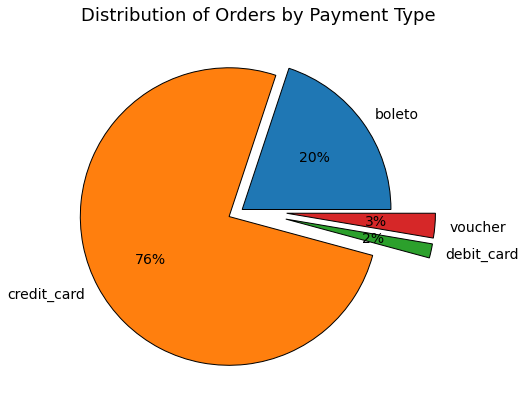

In [269]:
# Pie Chart

labels = df_payment.keys()
sizes = df_payment.values()

plt.figure(figsize = (7, 7), facecolor = 'white')
plt.pie(sizes, labels = labels, 
        autopct = '%1.0f%%', 
        startangle = 0,
        textprops = {'fontsize': 14},
        explode = (0, 0.1, 0.3, 0.3),
        wedgeprops = {'edgecolor': 'black'})
        # colors = ['skyblue', 'lightgreen'])
plt.title('Distribution of Orders by Payment Type', fontsize = 18)
plt.axis('equal')  
plt.show()

#### Freight Analysis

Aims to know the percentage postage discount on shipping payment that can still be profitable for the company

In [29]:
profit_admin = 0.3

df_freight = df.copy()
df_freight['sales_freight_payed_100'] = df_freight['sales'] * profit_admin - df_freight['freight_value']
df_freight['sales_freight_payed_50'] = df_freight['sales'] * profit_admin - df_freight['freight_value'] * 0.5
df_freight.order_approved_at = df_freight.order_approved_at.dt.to_period('M')
df_freight.head()

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,sales_freight_payed_100,sales_freight_payed_50
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90,52.040,62.005
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00,41.830,50.765
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99,-8.893,-2.498
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90,41.830,50.900
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90,-6.120,0.225


Average All Time Profit If Including Free Shipment (100%): 15.97 %
Average All Time Profit If Including Free Shipment (50%): 22.99 %


,order_count,sales,shipping_value,sales_shipping_payed_100,sales_shipping_payed_50,%profit_100,%profit_50
order_approved_at,,,,,,,
2016-10,267,41468.14,5255.31,7185.132,9812.787,17.33,23.66
2016-12,1,10.90,8.72,-5.450,-1.090,-50.00,-10.00
2017-01,698,112094.26,12749.45,20878.828,27253.553,18.63,24.31
2017-02,1604,240370.98,31681.34,40429.954,56270.624,16.82,23.41
2017-03,2464,358527.85,45842.30,61716.055,84637.205,17.21,23.61
2017-04,2188,342177.59,42341.32,60311.957,81482.617,17.63,23.81
2017-05,3390,511084.42,65475.74,87849.586,120587.456,17.19,23.59
2017-06,2993,425927.59,57685.18,70093.097,98935.687,16.46,23.23
2017-07,3673,491765.04,69930.96,77598.552,112564.032,15.78,22.89


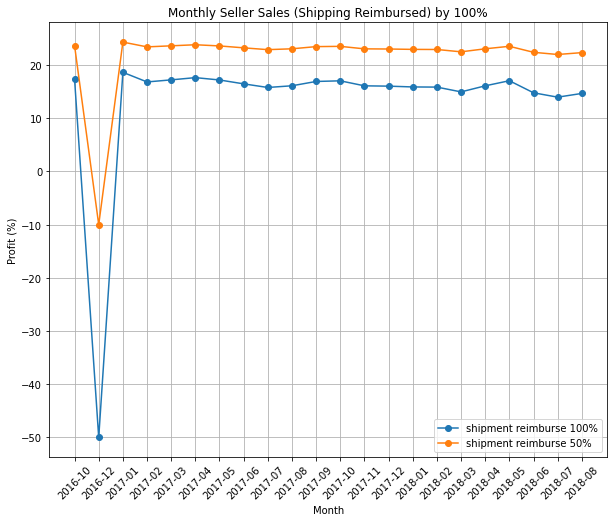

In [75]:
df_freight_monthly = df_freight.groupby(['order_approved_at']).agg({'sales' : ['count', 'sum'],
                                                                    'freight_value' : 'sum',
                                                                   'sales_freight_payed_100' : 'sum',
                                                                   'sales_freight_payed_50' : 'sum'})
df_freight_monthly.columns = ['order_count', 'sales', 'shipping_value', 'sales_shipping_payed_100', 'sales_shipping_payed_50']

# Make a Column to Represents Sales after Freight/Shipping Payed
df_freight_monthly['%profit_100'] = round(df_freight_monthly.sales_shipping_payed_100/df_freight_monthly.sales * 100, 2)
df_freight_monthly['%profit_50'] = round(df_freight_monthly.sales_shipping_payed_50/df_freight_monthly.sales * 100, 2)

avg_profit_free_shipment_100 = round(df_freight_monthly.sales_shipping_payed_100.sum()/df_freight_monthly.sales.sum() * 100, 2)
avg_profit_free_shipment_50 = round(df_freight_monthly.sales_shipping_payed_50.sum()/df_freight_monthly.sales.sum() * 100, 2)
print(f'Average All Time Profit If Including Free Shipment (100%): {avg_profit_free_shipment_100} %')
print(f'Average All Time Profit If Including Free Shipment (50%): {avg_profit_free_shipment_50} %')
display(df_freight_monthly)

df_freight_monthly.index = df_freight_monthly.index.astype(str)
plt.figure(figsize = (10, 8))
plt.plot(df_freight_monthly['%profit_100'], marker = 'o', label = 'shipment reimburse 100%')
plt.plot(df_freight_monthly['%profit_50'], marker = 'o', label = 'shipment reimburse 50%')
plt.title('Monthly Seller Sales (Shipping Reimbursed) by 100%')
plt.xlabel('Month')
plt.ylabel('Profit (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

#### Sales and Review Correlation

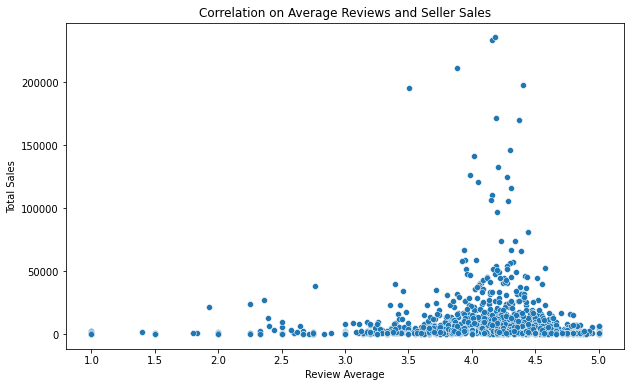

In [36]:
seller_reviews = df.groupby('seller_id')['review_score'].mean().reset_index()
seller_sales = df.groupby('seller_id')['sales'].sum().reset_index()

sales_reviews_sum = pd.merge(seller_reviews, seller_sales, on='seller_id')

# Plot korelasi
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'review_score',
                y = 'sales', 
                data = sales_reviews_sum)
plt.title('Correlation on Average Reviews and Seller Sales')
plt.xlabel('Review Average')
plt.ylabel('Total Sales')
plt.show()

#### Sales and Reviews Heatmap

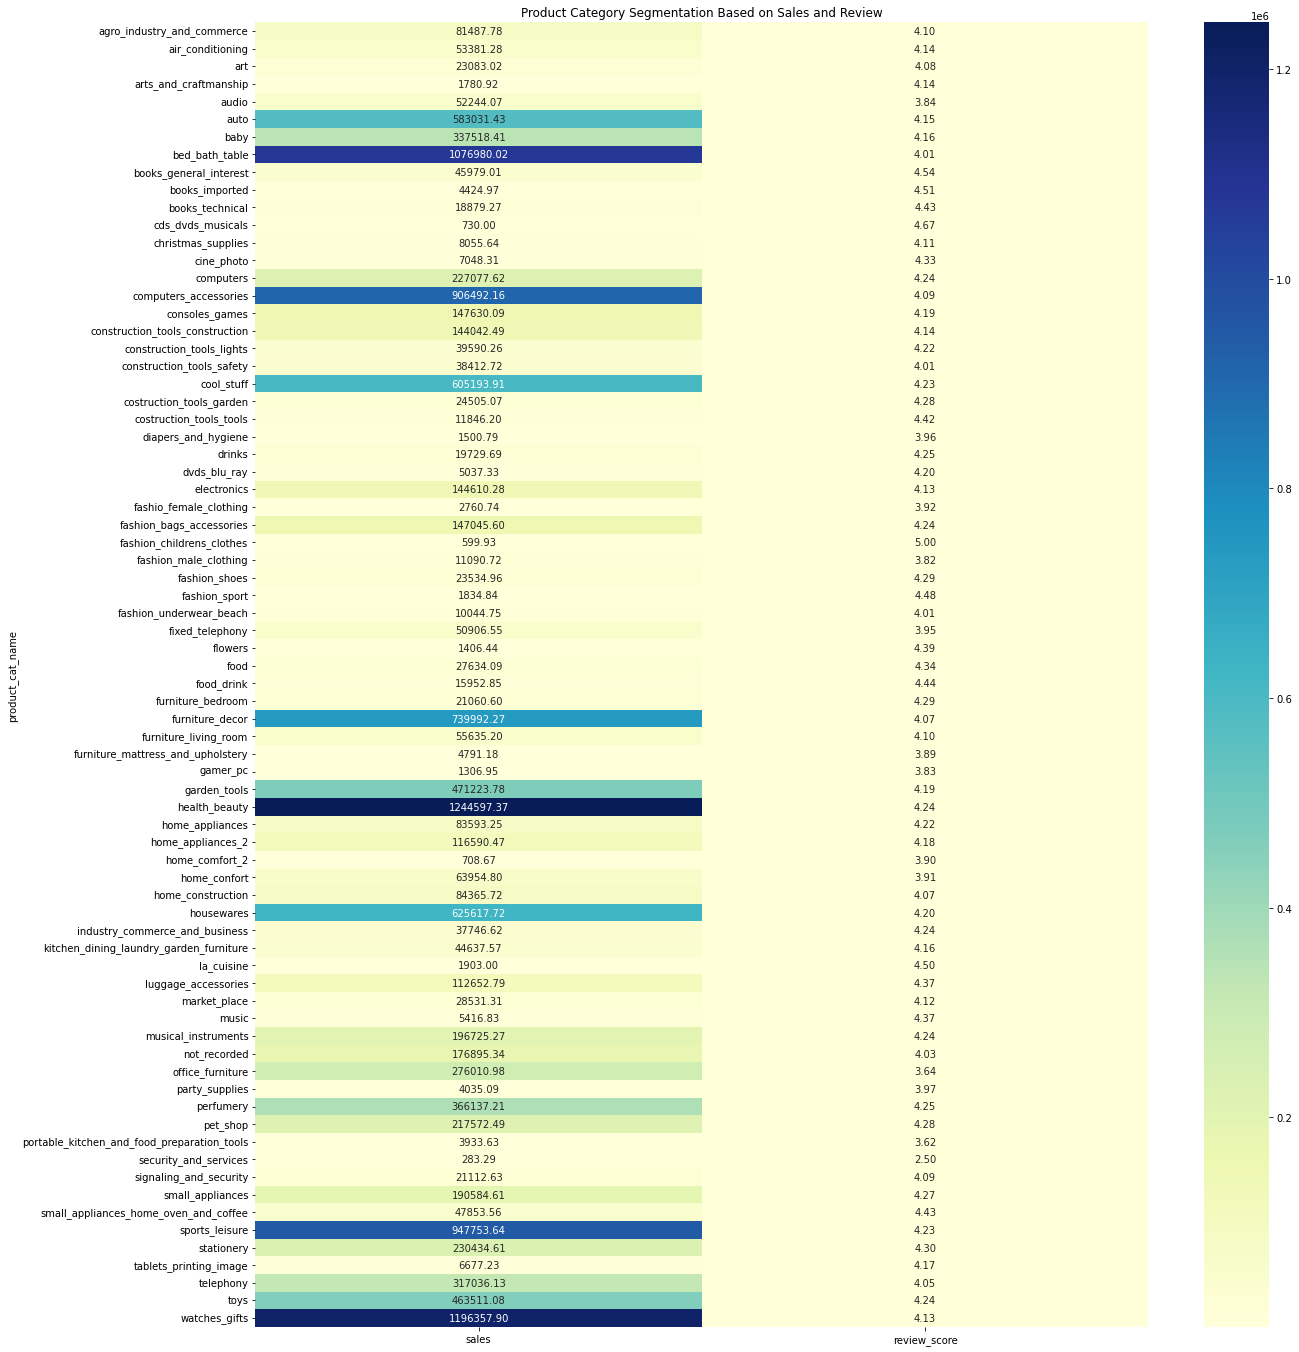

In [19]:
category_sales = df.groupby('product_cat_name')['sales'].sum().reset_index()
category_reviews = df.groupby('product_cat_name')['review_score'].mean().reset_index()

category_data = pd.merge(category_sales, category_reviews, on='product_cat_name')

# Heatmap untuk segmentasi kategori
category_data.set_index('product_cat_name', inplace = True)
plt.figure(figsize = (20, 24))
sns.heatmap(category_data, annot = True, cmap = 'YlGnBu', fmt = '.2f')
# plt.title('Segmentasi Kategori Produk berdasarkan Penjualan dan Review')
plt.title('Product Category Segmentation Based on Sales and Review')
plt.show()

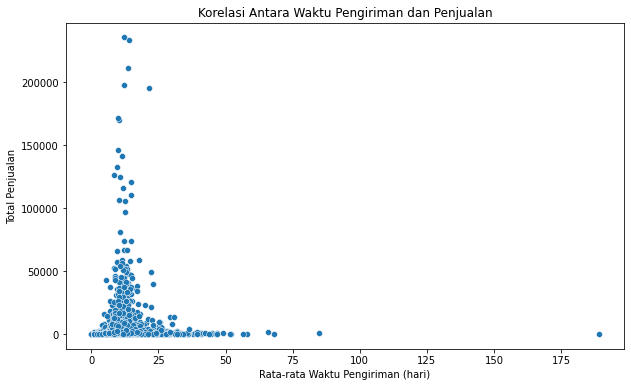

In [37]:
df_dlv_time = df.copy()

df_dlv_time['delivery_time'] = (df_dlv_time['order_delivered_customer_date'] - df_dlv_time['order_purchase_timestamp']).dt.days

seller_delivery_time = df_dlv_time.groupby('seller_id')['delivery_time'].mean().reset_index()
seller_sales = df_dlv_time.groupby('seller_id')['sales'].sum().reset_index()

delivery_sales = pd.merge(seller_delivery_time, seller_sales, on='seller_id')

# Plot delivery time vs sales
plt.figure(figsize = (10,6))
sns.scatterplot(x='delivery_time', y='sales', data = delivery_sales)
plt.title('Korelasi Antara Waktu Pengiriman dan Penjualan')
plt.xlabel('Rata-rata Waktu Pengiriman (hari)')
plt.ylabel('Total Penjualan')
plt.show()

In [217]:
df['order_delivered_customer_date']
# df['order_purchase_timestamp']

1       2017-04-26 10:53:06
2       2018-01-14 14:33:31
3       2018-08-08 10:00:35
4       2017-02-04 13:57:51
5       2017-05-15 21:42:34
                ...        
96455   2018-04-23 13:57:06
96456   2018-07-14 10:26:46
96457   2017-10-23 17:07:56
96458   2017-08-14 23:02:59
96459   2018-06-09 17:00:18
Name: order_purchase_timestamp, Length: 93100, dtype: datetime64[ns]

#### Seller Growth Analysis

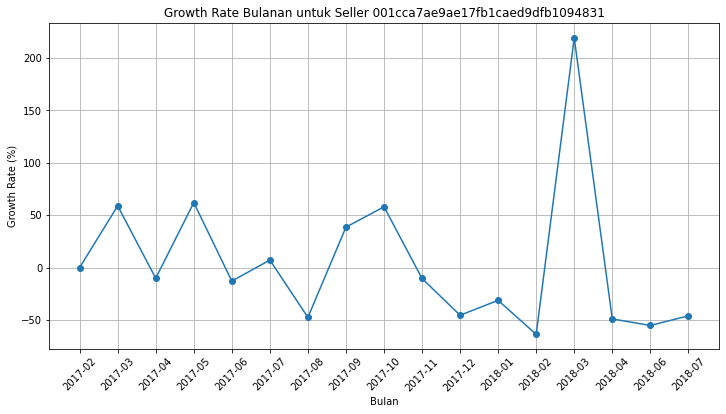

In [71]:
df['month_order'] = df['order_purchase_timestamp'].dt.to_period('M')

seller_monthly_sales = df.groupby(['seller_id', 'month_order'])['sales'].sum().reset_index()

seller_monthly_sales = seller_monthly_sales.sort_values(by = ['seller_id', 'month_order'])
seller_monthly_sales['monthly_growth'] = seller_monthly_sales.groupby('seller_id')['sales'].pct_change() * 100
seller_monthly_sales['seller_count'] = seller_monthly_sales.groupby('seller_id')['seller_id'].transform('count')
seller_monthly_sales.monthly_growth.fillna(0, inplace = True)
# seller_monthly_sales.monthly_growth.fillna(1e-6, inplace = True)

first_last_sales = seller_monthly_sales.groupby('seller_id').agg(
    first_month = ('month_order', 'first'),
    last_month = ('month_order', 'last'),
    first_sales = ('sales', 'first'),
    last_sales = ('sales', 'last')
).reset_index()

first_last_sales['first_sales'] = first_last_sales['first_sales'].replace(0, 1e-6)

first_last_sales['total_growth'] = ((first_last_sales['last_sales'] - first_last_sales['first_sales']) / first_last_sales['first_sales']) * 100

# Example
seller_id = '001cca7ae9ae17fb1caed9dfb1094831'  
seller_growth = seller_monthly_sales[seller_monthly_sales['seller_id'] == seller_id]

plt.figure(figsize = (12, 6))
plt.plot(seller_growth['month_order'].astype(str), seller_growth['monthly_growth'], marker = 'o')
plt.title(f'Growth Rate Bulanan untuk Seller {seller_id}')
plt.xlabel('Bulan')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [58]:
seller_monthly_sales

,seller_id,month_order,sales,monthly_growth,seller_count
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,895.0,0.000000,2
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,1790.0,100.000000,2
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,1098.9,0.000000,17
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,1746.6,58.940759,17
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,1568.3,-10.208405,17
...,...,...,...,...,...
15376,fffd5413c0700ac820c7069d66d98c89,2018-06,248.3,-79.855590,14
15377,fffd5413c0700ac820c7069d66d98c89,2018-07,286.0,15.183246,14
15378,fffd5413c0700ac820c7069d66d98c89,2018-08,485.4,69.720280,14
15379,ffff564a4f9085cd26170f4732393726,2016-10,120.5,0.000000,2


In [48]:
seller_avg_growth = seller_monthly_sales.groupby('seller_id').agg({'monthly_growth' : ['mean', 'count']}).reset_index().round(2)

seller_avg_growth.columns = ['seller_id', 'avg_growth_rate', 'months']
seller_avg_growth['avg_growth_rate'].fillna(0, inplace = True)
seller_avg_growth.sort_values(by = 'months', ascending = False, inplace = True)

display(seller_avg_growth)

seller_avg_growth_grp = seller_avg_growth.groupby('months').agg({'avg_growth_rate' : ['mean', 'count']}).round(2)
seller_avg_growth_grp.columns = ['avg_growth_rate', 'seller_count']
display(seller_avg_growth_grp)

,seller_id,avg_growth_rate,months
749,440dd6ab244315c632130ecfb63827b1,43.31,21
228,1554a68530182680ad5c8b042c3ab563,51.70,21
1955,b2ba3715d723d245138f291a6fe42594,52.66,21
1810,a3a38f4affed601eb87a97788c949667,63.19,21
1093,620c87c171fb2a6dd6e8bb4dec959fc6,33.87,21
...,...,...,...
933,535bf14f36346c7f59d87cece104d70c,0.00,1
2358,d598f929fc44e1e38678e7f47250ec04,0.00,1
930,533d46c1b06970e99f09523a61df4972,0.00,1
929,53336f97ddbe53e2a617d07b17447b95,0.00,1


,avg_growth_rate,seller_count
months,,
1,0.00,661
2,48.25,431
3,62.72,302
4,83.54,244
5,74.74,212
6,108.44,140
7,110.42,111
8,72.08,93
9,126.54,74


In [171]:
seller_avg_growth_grp[seller_avg_growth_grp.avg_growth_rate < 50]

,avg_growth_rate,seller_count
months,,
1,0.00,661
2,48.25,431


In [52]:
seller_1_month = seller_avg_growth[seller_avg_growth.months == 1]
seller_3_month = seller_avg_growth[(2 <= seller_avg_growth.months) & (seller_avg_growth.months <= 3)]
seller_6_month = seller_avg_growth[(4 <= seller_avg_growth.months) & (seller_avg_growth.months <= 6)]
seller_9_month = seller_avg_growth[(7 <= seller_avg_growth.months) & (seller_avg_growth.months <= 9)]
seller_12_month = seller_avg_growth[(10 <= seller_avg_growth.months) & (seller_avg_growth.months <= 12)]
seller_12_up_month = seller_avg_growth[seller_avg_growth.months > 12]

print(f'''Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : {len(seller_1_month)}, average : {seller_1_month.avg_growth_rate.mean().round(2)}
3 Month Seller    : {len(seller_3_month)}, average : {seller_3_month.avg_growth_rate.mean().round(2)}
6 Month Seller    : {len(seller_6_month)}, average : {seller_6_month.avg_growth_rate.mean().round(2)}
9 Month Seller    : {len(seller_9_month)}, average : {seller_9_month.avg_growth_rate.mean().round(2)}
12 Month Seller   : {len(seller_12_month)}, average : {seller_12_month.avg_growth_rate.mean().round(2)}
> 12 Month Seller : {len(seller_12_up_month)}, average : {seller_12_up_month.avg_growth_rate.mean().round(2)}''')

Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : 661, average : 0.0
3 Month Seller    : 733, average : 54.21
6 Month Seller    : 596, average : 86.26
9 Month Seller    : 278, average : 101.88
12 Month Seller   : 219, average : 91.29
> 12 Month Seller : 339, average : 87.64


In [121]:
seller_6_month.sort_values(by = ['seller_id', 'months'])

,seller_id,avg_growth_rate,months
9,00fc707aaaad2d31347cf883cd2dfe10,583.02,6
16,014d9a685fd57276679edd00e07089e5,43.60,4
18,01bcc9d254a0143f0ce9791b960b2a47,115.89,5
19,01c97ebb5cdac52891c0ed1c37ba0012,71.29,6
21,01ed254b9ff8407dfb9d99ba1e17d923,-29.60,4
...,...,...,...
2807,fec6275253471ace26d209bbaa64cd0f,16.67,5
2815,ff4e2d38692ce827b1a4f4b8196e680d,15.48,6
2816,ff4ea69c2a729e83e63c7579e4ef8170,69.70,4
2819,ffa6adafb71b807dc13159e26431354c,28.28,5


In [56]:
seller_monthly_sales[seller_monthly_sales.seller_id == 'a3dd39f583bc80bd8c5901c95878921e']

,seller_id,month_order,sales,monthly_growth
9948,a3dd39f583bc80bd8c5901c95878921e,2017-08,53.89,0.000000
9949,a3dd39f583bc80bd8c5901c95878921e,2017-09,52.00,-3.507144
9950,a3dd39f583bc80bd8c5901c95878921e,2017-10,2631.16,4959.923077
9951,a3dd39f583bc80bd8c5901c95878921e,2017-11,2076.90,-21.065234
9952,a3dd39f583bc80bd8c5901c95878921e,2017-12,359.50,-82.690548
9953,a3dd39f583bc80bd8c5901c95878921e,2018-02,149.00,-58.553547
9954,a3dd39f583bc80bd8c5901c95878921e,2018-03,49.90,-66.510067
9955,a3dd39f583bc80bd8c5901c95878921e,2018-04,149.70,200.000000


### **Sales Analysis**

In [236]:
df_sales = df.copy()
df_sales['sales_year'] = df_sales['order_approved_at'].dt.to_period('Y')
df_sales['sales_month'] = df_sales['order_approved_at'].dt.to_period('M')
df_sales['sales_month_name'] = df_sales['order_approved_at'].dt.month_name()
df_sales['profit'] = df_sales['sales'] * 0.2
df_sales.head()

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,month_order,sales_year,sales_month,sales_month_name,profit
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90,2017-04,2017,2017-04,April,47.980
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00,2018-01,2018,2018-01,January,39.800
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99,2018-08,2018,2018-08,August,2.598
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90,2017-02,2017,2017-02,February,39.980
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90,2017-05,2017,2017-05,May,4.380


,sales,freight_value,profit
sales_year,,,
2016,154.772537,19.641903,30.954507
2017,144.291122,19.345968,28.858224
2018,141.826969,20.638156,28.365394


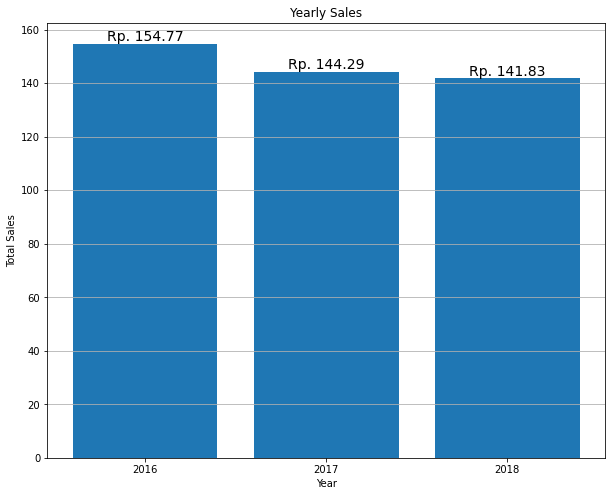

In [215]:
yearly_sales = df_sales.groupby('sales_year')[['sales', 'freight_value', 'profit']].mean()
yearly_sales.index = yearly_sales.index.astype(str)
display(yearly_sales)

plt.figure(figsize = (10, 8))
bars = plt.bar(yearly_sales.index, yearly_sales['sales'])

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset = False))
plt.gca().ticklabel_format(style = 'plain', axis = 'y')  

plt.grid(axis = 'y')

for bar in bars:
    yval  =  bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, 
             f'Rp. {yval:,.2f}', 
             ha = 'center', va = 'bottom', fontsize = 14)

plt.show()

#### Monthly Sales

,sales,freight_value,profit
sales_month_name,,,
January,1033986.02,142929.83,206797.204
February,1077695.76,150204.41,215539.152
March,1306222.18,188434.94,261244.436
April,1292815.89,174533.67,258563.178
May,1529810.41,197415.51,305962.082
June,1304766.89,191426.28,260953.378
July,1330628.07,204442.90,266125.614
August,1408980.85,208157.38,281796.170
September,607124.02,79460.72,121424.804


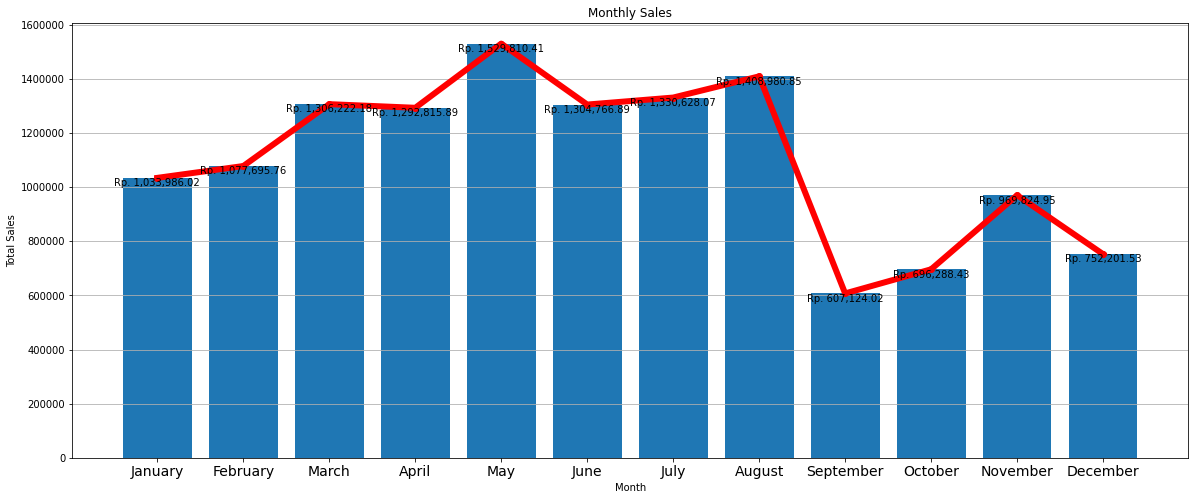

In [258]:
monthly_sales = df_sales.groupby('sales_month_name')[['sales', 'freight_value', 'profit']].sum()
monthly_sales.index = monthly_sales.index.astype(str)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month_type = pd.CategoricalDtype(categories = month_order, ordered=True)

monthly_sales.index = monthly_sales.index.astype(month_type)
monthly_sales = monthly_sales.sort_index()

# Tampilkan hasil
display(monthly_sales)

plt.figure(figsize = (20, 8))
bars = plt.bar(monthly_sales.index, monthly_sales['sales'], label = 'Bar - Sales')
plt.plot(monthly_sales.index, monthly_sales['sales'], color = 'red', 
         marker = 'o', label = 'Line - Sales', linewidth = 6)

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(fontsize = 14)

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset = False))
plt.gca().ticklabel_format(style = 'plain', axis = 'y')  

plt.grid(axis = 'y')

for bar in bars:
    yval  =  bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, 
             f'Rp. {yval:,.2f}', 
             ha = 'center', va = 'top', fontsize = 10)

plt.show()

#### Top 10 Product Sales

In [356]:
df_product_sales = df_sales.groupby('product_cat_name').agg({'order_id' : 'count',
                                                             'sales' : 'sum'})
df_product_sales.columns = ['order_count', 'sales']
# df_product_sales.sort_values(by = ['order_count', 'sales'],
df_product_sales.sort_values(by = ['sales'],
                          ascending = False,
                          inplace = True)
df_product_sales = df_product_sales.head(10)

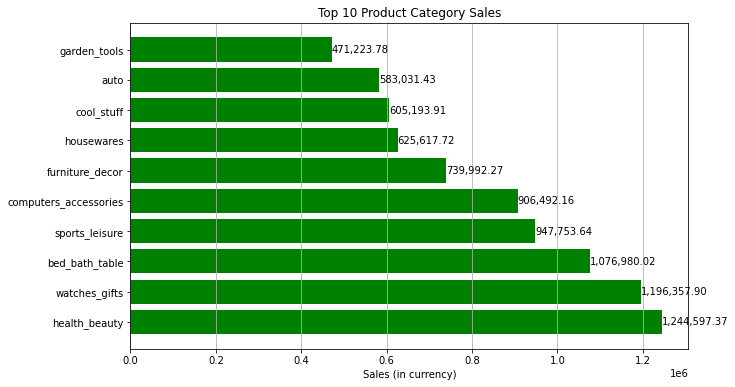

In [361]:
plt.figure(figsize = (10, 6))
bars = plt.barh(df_product_sales.index, df_product_sales['sales'], color = 'g')

plt.title('Top 10 Product Category Sales')
plt.xlabel('Sales (in currency)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis='x')

plt.show()

#### Top 10 City Sales

In [324]:
df_city_sales = df_sales.groupby('customer_city').agg({'order_id' : 'count',
                                                       'sales' : 'sum'})
df_city_sales.columns = ['order_count', 'sales']
df_city_sales.sort_values(by = ['order_count', 'sales'],
# df_city_sales.sort_values(by = ['sales', 'order_count'],
                          ascending = False,
                          inplace = True)
df_city_sales = df_city_sales.head(10)
df_city_sales

,order_count,sales
customer_city,,
sao paulo,14565,1894716.64
rio de janeiro,6365,959071.83
belo horizonte,2622,346959.97
brasilia,1856,275326.55
curitiba,1441,204592.19
campinas,1368,189820.24
porto alegre,1297,181467.94
salvador,1142,181158.30
guarulhos,1107,143660.44


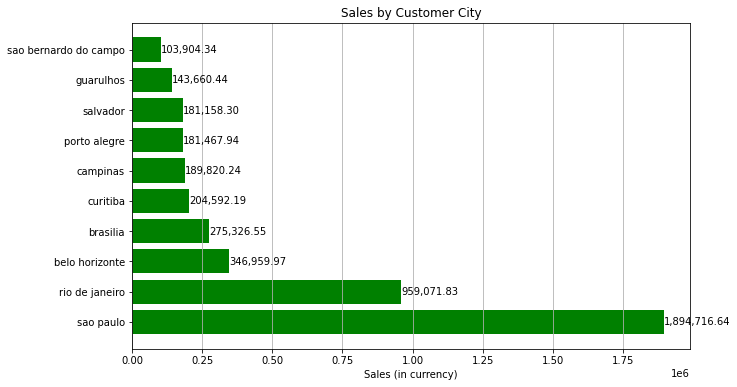

In [333]:
plt.figure(figsize = (10, 6))
bars = plt.barh(df_city_sales.index, df_city_sales['sales'], color = 'g')

plt.title('Sales by Customer City')
plt.xlabel('Sales (in currency)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis='x')

plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

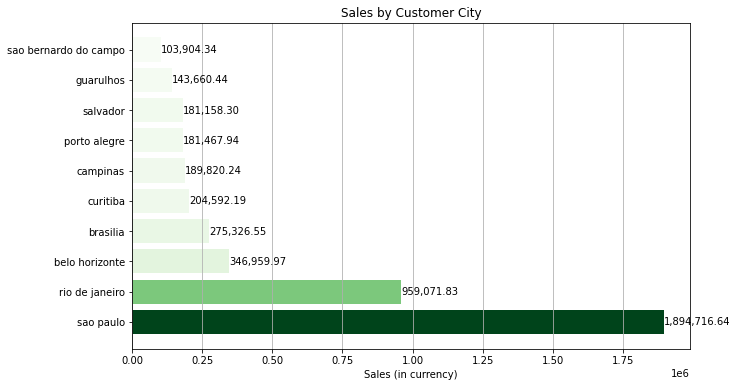

In [328]:
plt.figure(figsize = (10, 6))

norm = plt.Normalize(df_city_sales['sales'].min(), df_city_sales['sales'].max())
colors = plt.cm.Greens(norm(df_city_sales['sales']))
bars = plt.barh(df_city_sales.index, df_city_sales['sales'], color = colors)

plt.title('Sales by Customer City')
plt.xlabel('Sales (in currency)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis = 'x')

sm = plt.cm.ScalarMappable(cmap = 'Greens', norm = norm)
sm.set_array(df_city_sales['sales'])  
plt.colorbar(sm)

plt.show()

#### Year Order Sales Count

In [339]:
df_sales.head(2)

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,month_order,sales_year,sales_month,sales_month_name,profit
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.9,2017-04,2017,2017-04,April,47.98
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.0,2018-01,2018,2018-01,January,39.80


In [343]:
df_yearly_order = df_sales[['order_id', 'order_purchase_timestamp']].copy()
df_yearly_order['order_purchase_timestamp'] = df_yearly_order['order_purchase_timestamp'].dt.year

df_yearly_order = df_yearly_order.groupby('order_purchase_timestamp')['order_id'].count()
df_yearly_order.index = df_yearly_order.index.astype(str)

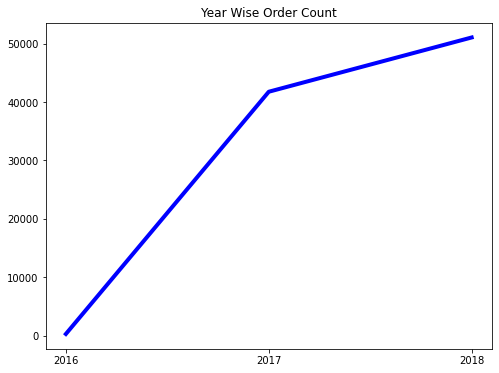

In [353]:
# Line Plot

plt.figure(figsize = (8, 6))
plt.plot(df_yearly_order, linewidth = 4, color = 'blue')
plt.title('Year Wise Order Count')
plt.show()

#### Ntar

In [233]:
temp_df = monthly_sales.reset_index()
temp_df
# temp_df_2017 = temp_df[temp_df.sales_month]
temp_df_2017 = temp_df[temp_df['sales_month'].str.contains('2017')]
temp_df_2018 = temp_df[temp_df['sales_month'].str.contains('2018')]

display(temp_df_2017)
display(temp_df_2018)
temp_df_2017.set_index('sales_month', inplace=True)
temp_df_2018.set_index('sales_month', inplace=True)

# Gabungkan kedua DataFrame secara horizontal (samping-sampingan)
df_1718_sales = pd.concat([temp_df_2017, temp_df_2018], axis=1)

# Melihat hasil
display(df_1718_sales)

,sales_month,sales,freight_value,profit
2,2017-01,112094.26,12749.45,22418.852
3,2017-02,240370.98,31681.34,48074.196
4,2017-03,358527.85,45842.30,71705.570
5,2017-04,342177.59,42341.32,68435.518
6,2017-05,511084.42,65475.74,102216.884
7,2017-06,425927.59,57685.18,85185.518
8,2017-07,491765.04,69930.96,98353.008
9,2017-08,552763.68,76816.08,110552.736
10,2017-09,607124.02,79460.72,121424.804
11,2017-10,654820.29,84946.45,130964.058


,sales_month,sales,freight_value,profit
14,2018-01,921891.76,130180.38,184378.352
15,2018-02,837324.78,118523.07,167464.956
16,2018-03,947694.33,142592.64,189538.866
17,2018-04,950638.30,132192.35,190127.660
18,2018-05,1018725.99,131939.77,203745.198
19,2018-06,878839.30,133741.10,175767.860
20,2018-07,838863.03,134511.94,167772.606
21,2018-08,856217.17,131341.30,171243.434


,sales,freight_value,profit,sales,freight_value,profit
sales_month,,,,,,
2017-01,112094.26,12749.45,22418.852,NaN,NaN,NaN
2017-02,240370.98,31681.34,48074.196,NaN,NaN,NaN
2017-03,358527.85,45842.30,71705.570,NaN,NaN,NaN
2017-04,342177.59,42341.32,68435.518,NaN,NaN,NaN
2017-05,511084.42,65475.74,102216.884,NaN,NaN,NaN
2017-06,425927.59,57685.18,85185.518,NaN,NaN,NaN
2017-07,491765.04,69930.96,98353.008,NaN,NaN,NaN
2017-08,552763.68,76816.08,110552.736,NaN,NaN,NaN
2017-09,607124.02,79460.72,121424.804,NaN,NaN,NaN


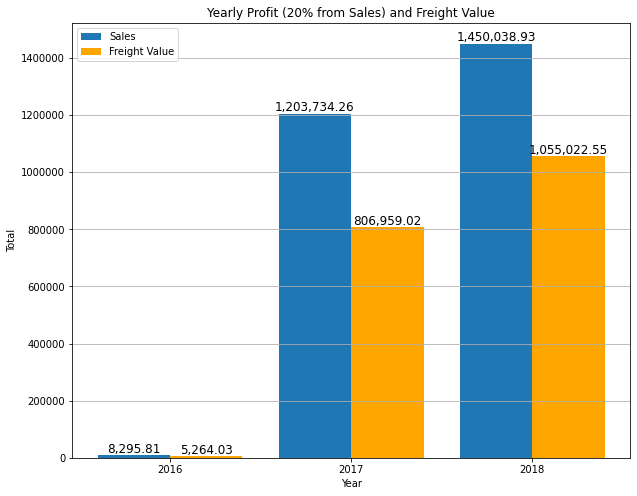

In [131]:
plt.figure(figsize = (10, 8))

bar_width = 0.4
years = yearly_sales.index

positions_profit = range(len(years))
positions_freight = [p + bar_width for p in positions_profit]

bars_sales = plt.bar(positions_profit, yearly_sales['profit'], width = bar_width, label = 'Sales')
bars_freight = plt.bar(positions_freight, yearly_sales['freight_value'], width = bar_width, label = 'Freight Value', color = 'orange')

plt.title('Yearly Profit (20% from Sales) and Freight Value')
plt.xlabel('Year')
plt.ylabel('Total')
plt.xticks([p + bar_width / 2 for p in positions_profit], years)  
plt.legend()

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset = False))
plt.gca().ticklabel_format(style = 'plain', axis = 'y')

plt.grid(axis = 'y')

for bar in bars_sales:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.2f}', ha = 'center', va = 'bottom', fontsize = 12)

for bar in bars_freight:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.2f}', ha = 'center', va = 'bottom', fontsize = 12)

plt.show()

In [166]:
year_2019 = pd.DataFrame(yearly_sales.loc['2018'] * 1.2).round(2)
year_2019.columns = ['2019']
# year_2019 = year_2019.T

# yearly_sales.loc['2019'] = year_2019

display(year_2019)

,2019
sales,8700233.59
freight_value,1266027.06
profit,1740046.72
